In [12]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from model_for_randon_data import * 

In [2]:
df, df_X, df_y= pipeline()

In [3]:
df_X.shape

(2542, 2499)

In [5]:
int(0.9*len(df_X))

2287

In [9]:
y_predict=0

X_train, X_test=df_X.iloc[:int(0.9*len(df_X)),:],df_X.iloc[int(0.9*len(df_X)):,:]
y_train, y_test=df_y.iloc[0:int(0.9*len(df_X)),y_predict],df_y.iloc[int(0.9*len(df_X)):,y_predict]

In [37]:
numRound = 1000
eta= 0.005
params["base_score"] =   50000
#params["nworkers"] =  1
#General Parameters
params["booster"] =  "gbtree"
#params["silent"] =  0.0
params["verbosity"] =  1

#Booster Parameters

max_depth =  9 #//use CV
params["min_child_weight"] =  1.0 #use CV
params["gamma"] =  0.0 #alias min_split_loss use CV
params["subsample"] =  0.8 #CV 0.5-1
params["colsample_bytree"] =  0.8 #CV -.5 to 1
#params["lambda"] =  1.0 # L2 regularization term. Ridge regression
#params["alpha"] =  0.0 # L1 regularization term. Lasso regression
#
#params["max_delta_step"] =  0.0 # not affect much
#params["colsample_bylevel"] =  1.0 # not affect much if colsample_bytree CV

#raddar
#colsample_bylevel, which is very good replacement for colsample_bytree - heard that in many cases it outperformed the latter)

params["scale_pos_weight"] =  1.0
#Learning Task Parameters
objective =  "reg:squarederror"
params["eval_metric"] =  "rmse"
#params["seed"] =  0


In [38]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [39]:
xg_reg = xgb.XGBRegressor(objective =objective, colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = max_depth, alpha = 10, n_estimators = 10,eta=eta)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 66670.538178


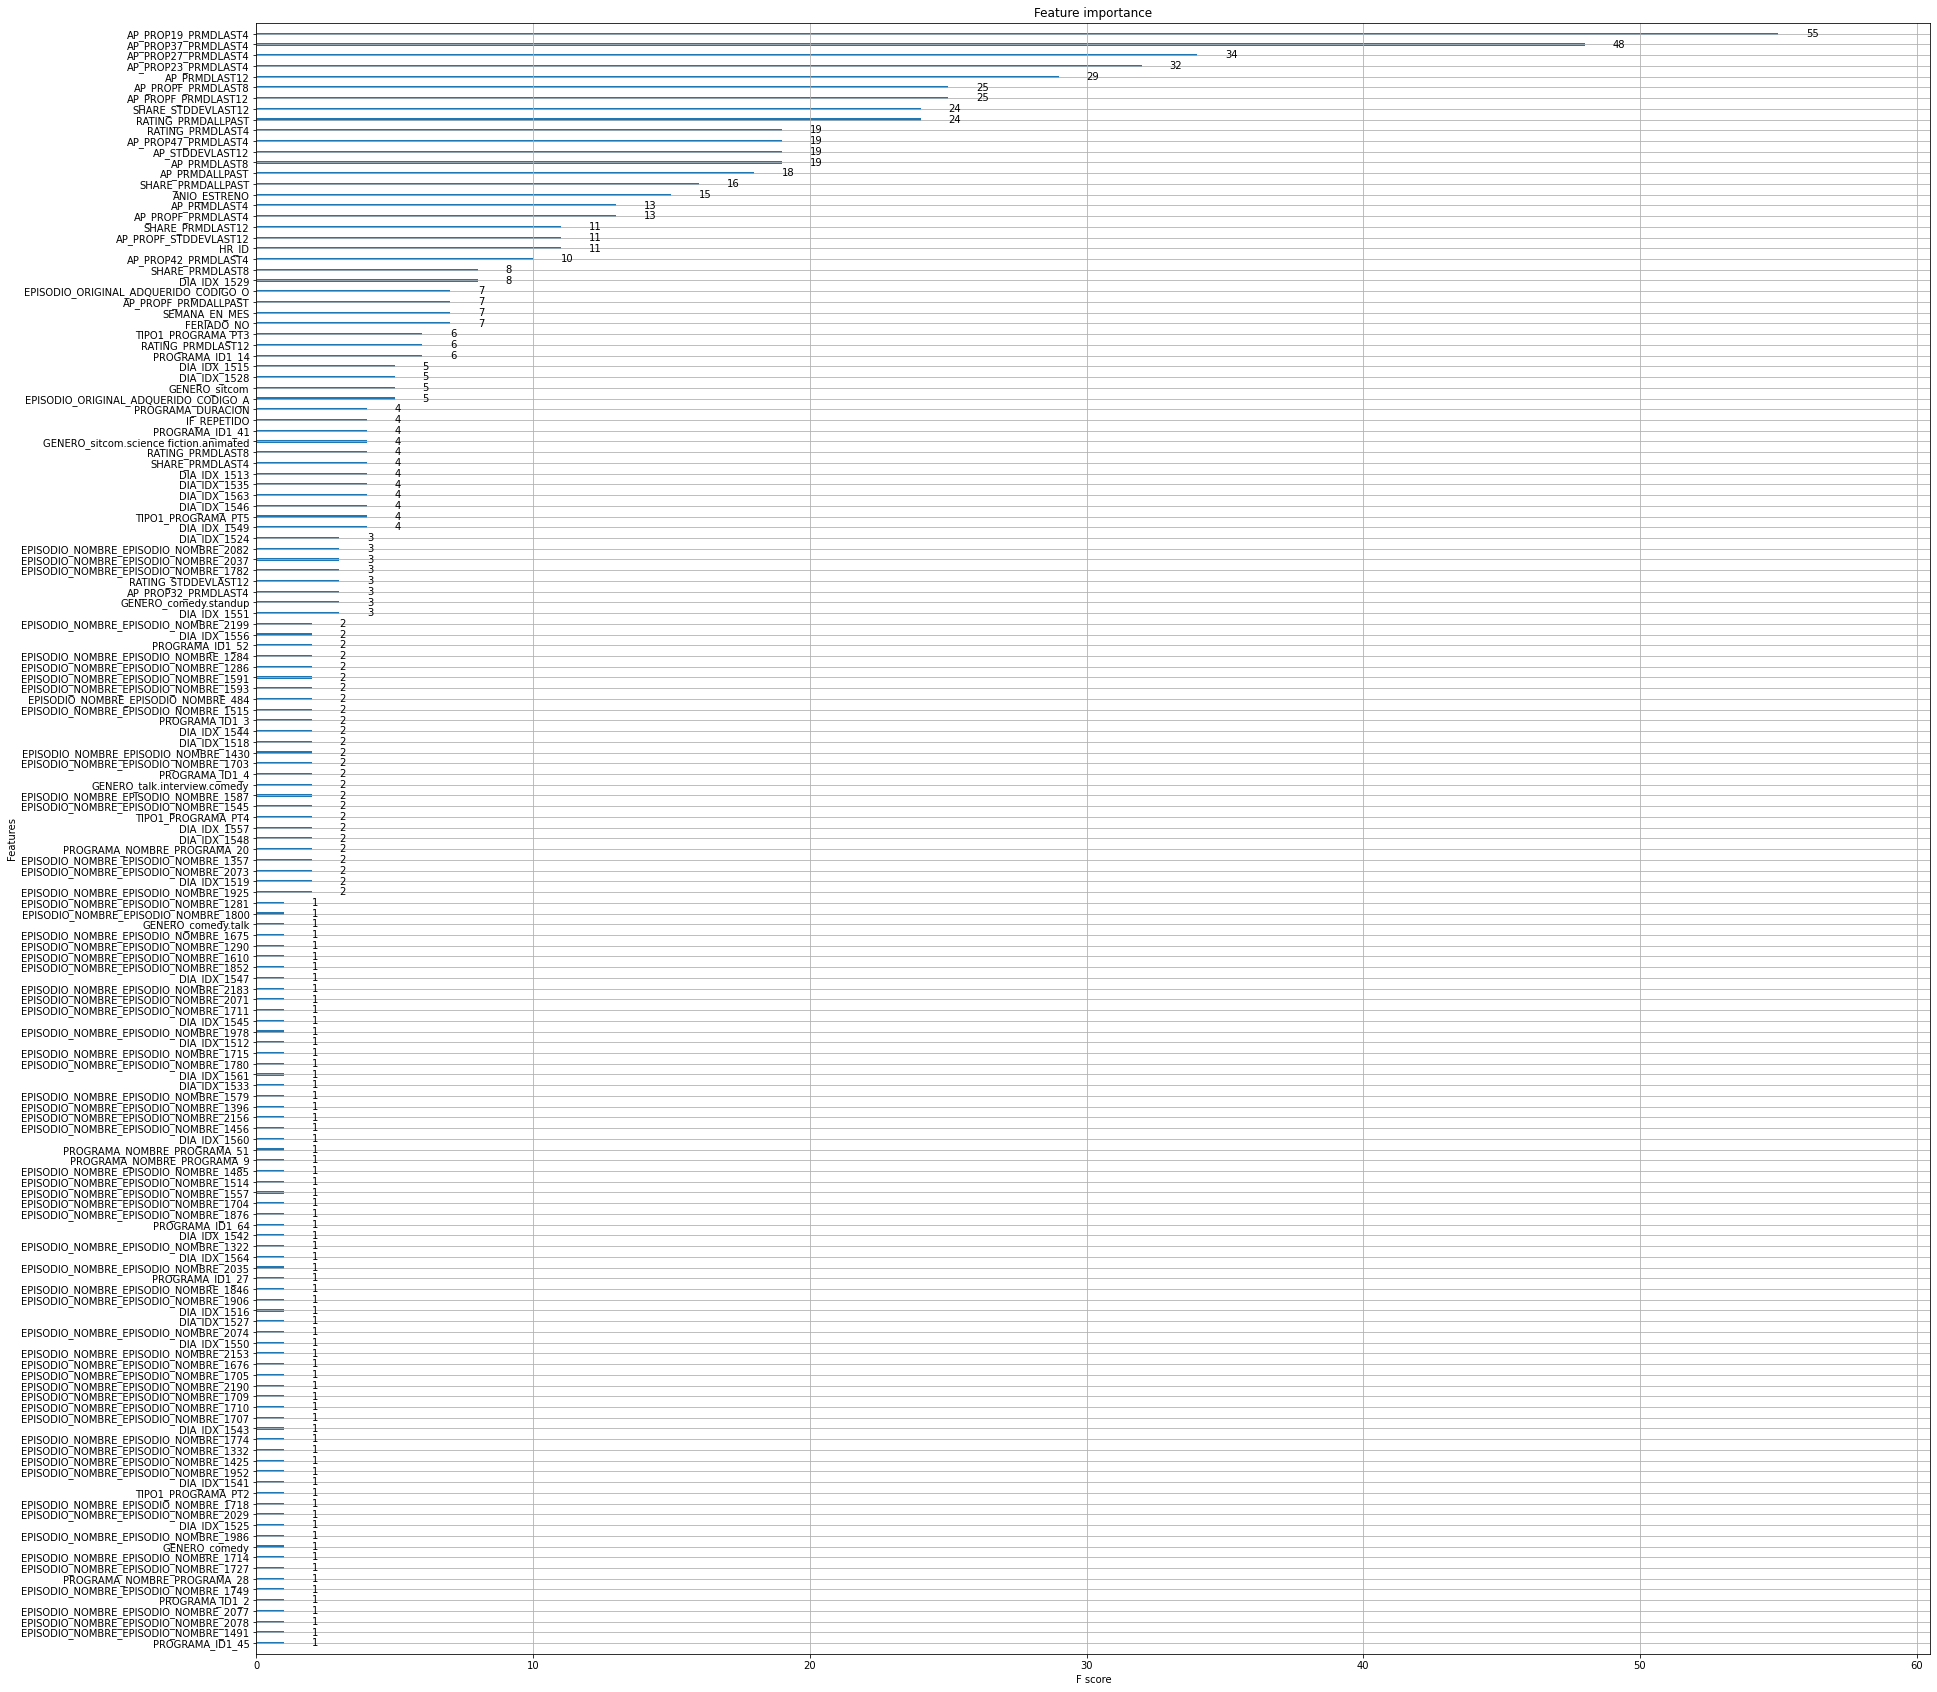

In [41]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()